In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")

In [7]:
import torch
import numpy as np
import networkx as nx
import os

In [20]:
results_dir = "../results/2021-08-02_08-22_dist_dense_tuning1"

results1 = torch.load(os.path.join(results_dir, "primal_iterations_3_results.pt"), map_location=torch.device("cpu"))
results2 = torch.load(os.path.join(results_dir, "primal_iterations_5_results.pt"), map_location=torch.device("cpu"))
results3 = torch.load(os.path.join(results_dir, "primal_iterations_10_results.pt"), map_location=torch.device("cpu"))
results_solo = torch.load(os.path.join(results_dir, "solo_results.pt"), map_location=torch.device("cpu"))


dict_keys(['validation_loss', 'mesh_grid_density'])

# Communication Graph

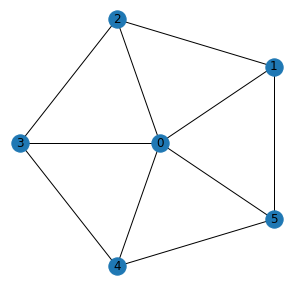

In [9]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)

# Validation loss

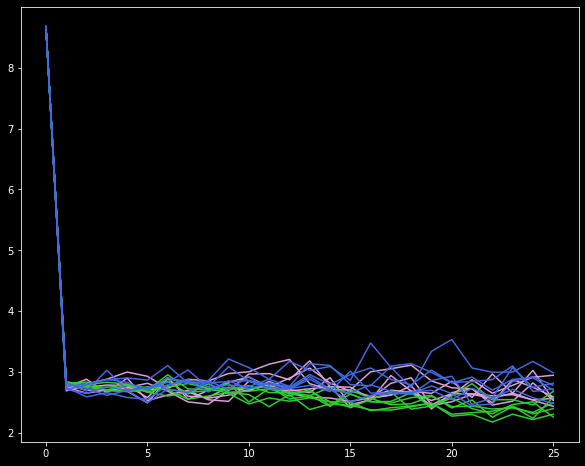

In [16]:
vl1 = torch.stack(results1["validation_loss"])
vl2 = torch.stack(results2["validation_loss"])
vl3 = torch.stack(results3["validation_loss"])

(fig, ax) = plt.subplots(figsize=(10, 8))

ax.plot(vl1, color="plum")
ax.plot(vl2, color="limegreen")
ax.plot(vl3, color="royalblue")

# Density Plots

torch.Size([54471, 1])

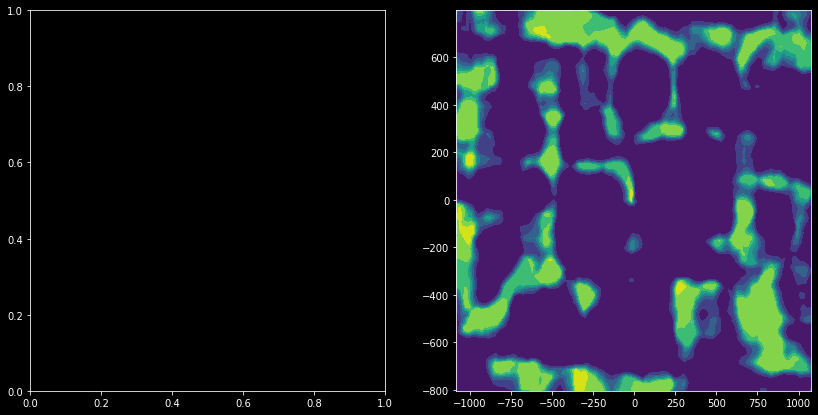

In [24]:
dens = results2["mesh_grid_density"]
locs = results2["mesh_inputs"]

agent = 0
solo_dens = results_solo[agent]["mesh_grid_density"]

(fig, (ax0, ax1)) = plt.subplots(ncols=2, figsize=(14, 7))

ax0.tricontourf(locs[:, 0], locs[:, 1], torch.squeeze(solo_dens))

z = (torch.squeeze(dens[-1]))[agent, :]
ax1.tricontourf(locs[:, 0], locs[:, 1], z)

# Denisty Animation

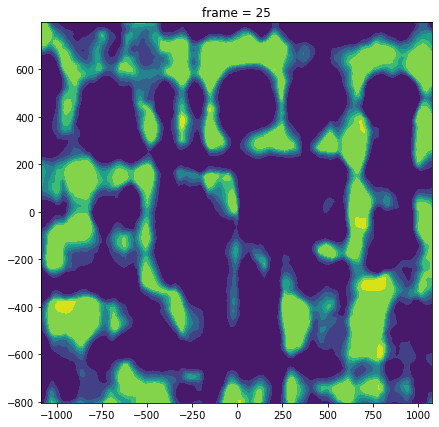

In [11]:
dens1 = results1["mesh_grid_density"]
locs = results1["mesh_inputs"]

num_frames = len(dens1)
agent = 0

(fig, ax) = plt.subplots(figsize=(7, 7))

def animate(i):
    global cont
    z = (torch.squeeze(dens1[i]))[agent, :]
    ax.tricontourf(locs[:, 0], locs[:, 1], z)
    ax.set_title("frame = {}".format(i))

anim = animation.FuncAnimation(fig, animate, frames=num_frames, repeat=True)
#anim.save("density_animation.mp4")